**Exercise 1:**

Maritime Logistics Probabilistic Model
Consider a directed graph model for predicting successful cargo delivery in a maritime logistics network:

W: Weather conditions (1: Favorable, 2: Moderate, 3: Severe)\
P: Port congestion (1: Low, 2: Medium, 3: High)\
S: Ship maintenance status (1: Excellent, 2: Average, 3: Poor)\
D: Delivery outcome (1: On-time, 2: Delayed, 3: Significantly delayed)\

The directed graph structure is as follows:\
W -> P\
W -> D\
P -> D\
S -> D\
Given the following probabilities:\
P(W = 1) = 0.5, P(W = 2) = 0.3, P(W = 3) = 0.2\
P(S = 1) = 0.6, P(S = 2) = 0.3, P(S = 3) = 0.1

P(P = 1 | W = 1) = 0.7, P(P = 2 | W = 1) = 0.2, P(P = 3 | W = 1) = 0.1\
P(P = 1 | W = 2) = 0.3, P(P = 2 | W = 2) = 0.5, P(P = 3 | W = 2) = 0.2\
P(P = 1 | W = 3) = 0.1, P(P = 2 | W = 3) = 0.3, P(P = 3 | W = 3) = 0.6

P(D = 1 | W = 1, P = 1, S = 1) = 0.9, P(D = 2 | W = 1, P = 1, S = 1) = 0.1, P(D = 3 | W = 1, P = 1, S = 1) = 0.0\
P(D = 1 | W = 2, P = 2, S = 2) = 0.5, P(D = 2 | W = 2, P = 2, S = 2) = 0.4, P(D = 3 | W = 2, P = 2, S = 2) = 0.1\
P(D = 1 | W = 3, P = 3, S = 3) = 0.1, P(D = 2 | W = 3, P = 3, S = 3) = 0.3, P(D = 3 | W = 3, P = 3, S = 3) = 0.6

Tasks:\

Visualize the directed graph for this maritime logistics model.\
Calculate P(D = 1 | W = 1, S = 1), the probability of on-time delivery given favorable weather and excellent ship maintenance.\
Discuss how this model could be used to improve maritime logistics planning.

C:\Users\hdste\AppData\Local\Temp\ipykernel_5108\3787618848.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


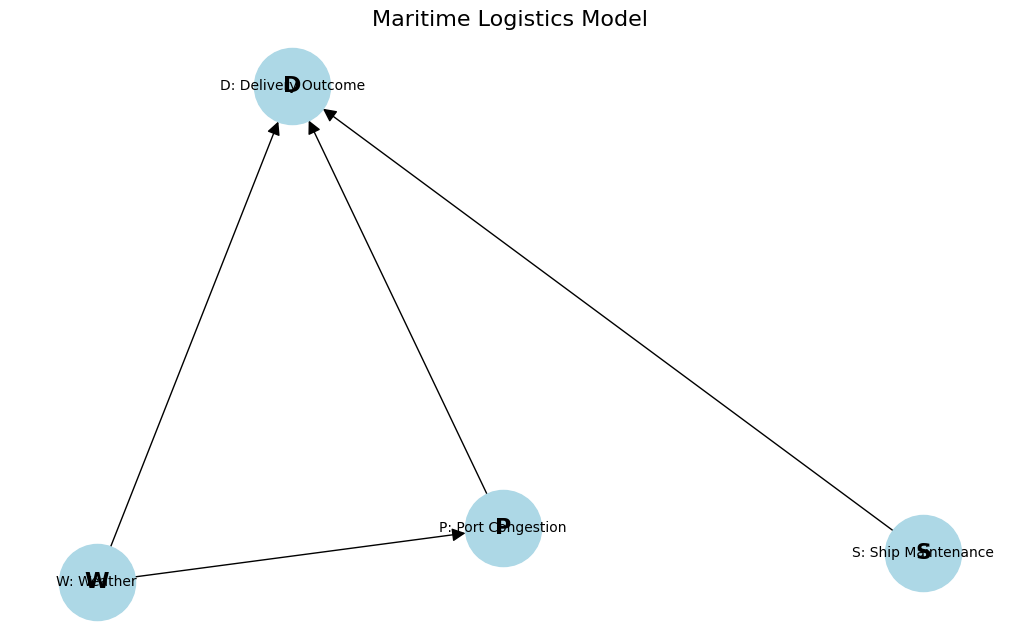

P(D = 1 | W = 1, S = 1) = 0.7290

Explanation:
We use the law of total probability:
P(D = 1 | W = 1, S = 1) = P(D = 1 | W = 1, P = 1, S = 1) * P(P = 1 | W = 1) +
                          P(D = 1 | W = 1, P = 2, S = 1) * P(P = 2 | W = 1) +
                          P(D = 1 | W = 1, P = 3, S = 1) * P(P = 3 | W = 1)
                        = 0.9000 * 0.7000 +
                        = 0.3300 * 0.2000 +
                        = 0.3300 * 0.1000 +
                        = 0.7290


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from([('W', 'P'), ('W', 'D'), ('P', 'D'), ('S', 'D')])

# Visualize the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, arrowsize=20, font_size=16, font_weight='bold')

node_labels = {
    'W': 'W: Weather',
    'P': 'P: Port Congestion',
    'S': 'S: Ship Maintenance',
    'D': 'D: Delivery Outcome'
}

nx.draw_networkx_labels(G, pos, node_labels, font_size=10)
plt.title("Maritime Logistics Model", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate P(D = 1 | W = 1, S = 1)
def P_P_given_W(w):
    if w == 1:
        return [0.7, 0.2, 0.1]
    elif w == 2:
        return [0.3, 0.5, 0.2]
    else:  # w == 3
        return [0.1, 0.3, 0.6]

def P_D_given_WPS(w, p, s):
    if w == 1 and p == 1 and s == 1:
        return [0.9, 0.1, 0.0]
    elif w == 2 and p == 2 and s == 2:
        return [0.5, 0.4, 0.1]
    elif w == 3 and p == 3 and s == 3:
        return [0.1, 0.3, 0.6]
    else:
        return [0.33, 0.33, 0.34]  # Assume roughly equal probability for unspecified cases

# P(D = 1 | W = 1, S = 1) = Σp P(D = 1 | W = 1, P = p, S = 1) * P(P = p | W = 1)
P_P_given_W1 = P_P_given_W(1)
P_D1_given_W1S1 = sum([P_D_given_WPS(1, p, 1)[0] * P_P_given_W1[p-1] for p in [1, 2, 3]])

print(f"P(D = 1 | W = 1, S = 1) = {P_D1_given_W1S1:.4f}")

# Explanation of the calculation
print("\nExplanation:")
print("We use the law of total probability:")
print("P(D = 1 | W = 1, S = 1) = P(D = 1 | W = 1, P = 1, S = 1) * P(P = 1 | W = 1) +")
print("                          P(D = 1 | W = 1, P = 2, S = 1) * P(P = 2 | W = 1) +")
print("                          P(D = 1 | W = 1, P = 3, S = 1) * P(P = 3 | W = 1)")
for p in [1, 2, 3]:
    print(f"                        = {P_D_given_WPS(1, p, 1)[0]:.4f} * {P_P_given_W1[p-1]:.4f} +")
print(f"                        = {P_D1_given_W1S1:.4f}")

**Exercise 2: Weather Prediction using Markov Chains**

Consider a simple weather model for a particular location with three possible states:
1. Sunny (S)\
2. Cloudy (C)\
3. Rainy (R)

The weather follows a Markov chain model with the following transition matrix:

             To: S    C    R\
    From: S [0.7, 0.2, 0.1]\
          C [0.3, 0.4, 0.3]\
          R [0.2, 0.3, 0.5]

For example, if it's Sunny today, there's a 70% chance it will be Sunny tomorrow, \
20% chance it will be Cloudy, and 10% chance it will be Rainy.

Tasks:\
1. Visualize the Markov chain as a directed graph.\
2. If it's Sunny today, what's the probability it will be Rainy two days from now?\
3. Calculate the steady-state probabilities for each weather state.\
4. Simulate the weather for the next 30 days, starting from a Sunny day.

C:\Users\hdste\AppData\Local\Temp\ipykernel_5108\2731512287.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


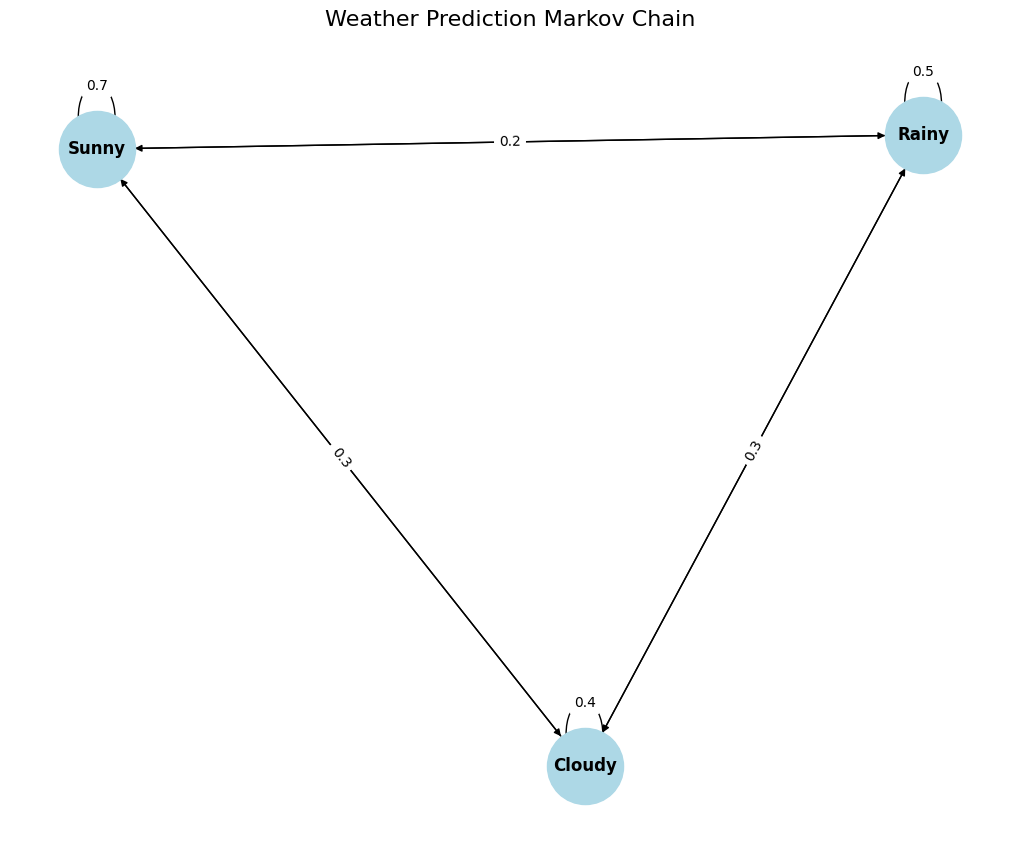

Probability of Rainy two days from Sunny: 0.1800

Steady-state probabilities:
Sunny: 0.4565
Cloudy: 0.2826
Rainy: 0.2609

Simulated weather for 30 days:
Sunny -> Sunny -> Rainy -> Rainy -> Rainy -> Sunny -> Sunny -> Sunny -> Cloudy -> Cloudy -> Rainy -> Sunny -> Rainy -> Rainy -> Cloudy -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Cloudy -> Sunny -> Sunny -> Sunny


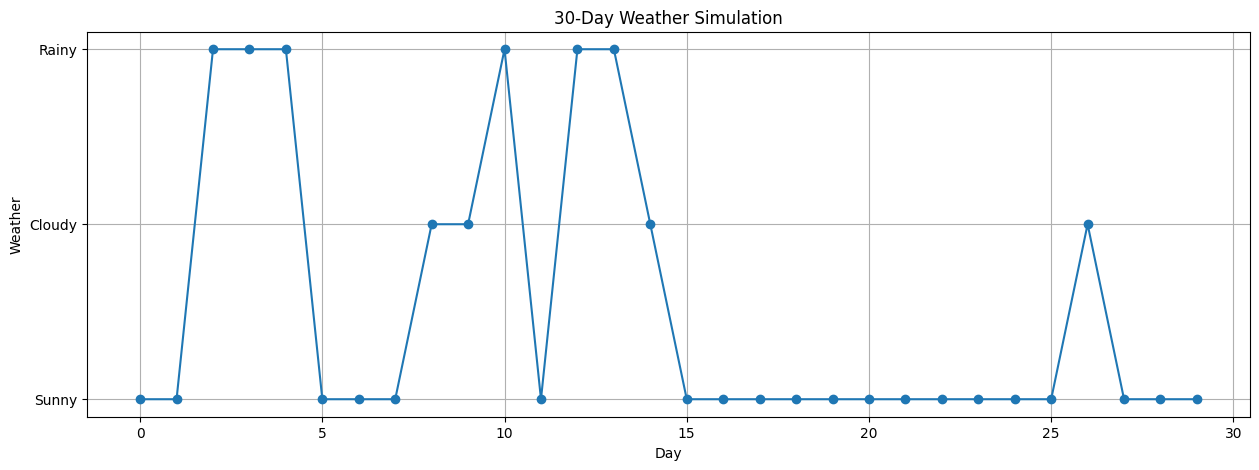

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the transition matrix
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

# Task 1: Visualize the Markov chain
def visualize_markov_chain(P):
    G = nx.DiGraph()
    states = ['Sunny', 'Cloudy', 'Rainy']
    for i, state in enumerate(states):
        G.add_node(state)
        for j, next_state in enumerate(states):
            if P[i, j] > 0:
                G.add_edge(state, next_state, weight=P[i, j], label=f'{P[i, j]:.1f}')

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=12, font_weight='bold')
    
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Weather Prediction Markov Chain", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_markov_chain(P)

# Task 2: Probability of Rainy two days from Sunny
prob_rainy_two_days = np.dot(np.dot([1, 0, 0], P), P)[2]
print(f"Probability of Rainy two days from Sunny: {prob_rainy_two_days:.4f}")

# Task 3: Calculate steady-state probabilities
def steady_state(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary = eigenvectors[:, np.isclose(eigenvalues, 1)].real
    stationary = stationary / np.sum(stationary)
    return stationary.flatten()

steady_probs = steady_state(P)
states = ['Sunny', 'Cloudy', 'Rainy']
print("\nSteady-state probabilities:")
for state, prob in zip(states, steady_probs):
    print(f"{state}: {prob:.4f}")

# Task 4: Simulate weather for 30 days
def simulate_weather(P, days, start_state):
    states = ['Sunny', 'Cloudy', 'Rainy']
    current_state = start_state
    simulation = [states[current_state]]
    for _ in range(days - 1):
        current_state = np.random.choice(3, p=P[current_state])
        simulation.append(states[current_state])
    return simulation

np.random.seed(42)  # for reproducibility
simulation = simulate_weather(P, 30, 0)  # 0 represents Sunny start state
print("\nSimulated weather for 30 days:")
print(' -> '.join(simulation))

# Visualize the simulation
plt.figure(figsize=(15, 5))
plt.plot(range(30), [states.index(day) for day in simulation], marker='o')
plt.yticks(range(3), states)
plt.xlabel('Day')
plt.ylabel('Weather')
plt.title('30-Day Weather Simulation')
plt.grid(True)
plt.show()